# Анализ оттока клиентов банка "Метанпром"

## Материалы

- [Презентация](https://drive.google.com/file/d/1gQcplhCkoD454smszzXcrcpx9-fwDXc6/view?usp=sharing)
- [Дашборд](https://public.tableau.com/app/profile/alexey.potanin/viz/metanprom_dashboard/sheet1#1)


## Цель

- составить портрет клиента, склонного к уходу и предложить меры по его удержанию

## Задачи  проекта

- анализ оттока клиентов и сегментирование пользователей банка
- проверка гипотез по оттоку клиентов
- подготовка рекомендаций для отдела маркетинга


## Предварительный план

- [Загрузить данные и импорировать необходимые библиотеки](#title1)
- [Предобработка данных:](#title2)
    - приведение к корректному типу данных
    - проверка на наличие пропусков
    - проверка на наличие дубликатов
    - проверка значений на выбросы
    - кодирование части данных
    - категоризация части данных
- [Исследовательский анализ данных:](#title3)
    - анализ оттока клиентов с учетом имеющихся данных (город, пол, возраст);
    - составление портрета уходящих клиентов
- [Статистический анализ данных:](#title4)
    - выдвижение и проверка гипотез (возможно, зависимость от возраста, дохода)
    - формулирование промежуточных выводов на основе статистического анализа
- [Сегментация пользователей и их приоритизация](#title5)
- [Сформулировать меры по снижению оттока](#title6)
- Подготовить дашборд и презентацию по результатам исследования

## Данные:

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

- *USERID* идентификатор пользователя
- *score* баллы кредитного скоринга
- *city* город
- *gender* пол
- *age* возраст
- *equity* количество баллов собственности
- *balance* баланс на счёте
- *products* количество продуктов, которыми пользуется клиент
- *credit_card* есть ли кредитная карта
- *last_activity* активный клиент
- *EST_SALARY* оценочный доход клиента
- *churn* признак оттока


## Библиотеки:

pandas, seaborn, Matplotlib, numpy (предварительно)

## Автор

Алексей Потанин

[email](avpotanin@gmail.com)
[github](https://github.com/potashka)



# <a id="title1">Загрузка данных и импорт библиотек</a>

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from scipy import stats as st 

import warnings
warnings.filterwarnings('ignore') # фильтр предупреждений

In [2]:
# df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
try:
    df = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# первые пять записей датафрейма
display(df.head())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


In [5]:
# случайные записи датафрейма
display(df.sample(5))

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
1941,211952,880.00,Ярославль,М,46.00,3,868342.16,2,0,0,200275.54,0
7834,214884,871.00,Ярославль,М,40.00,3,262303.50,2,1,0,170656.75,0
4786,222198,917.00,Ярославль,М,35.00,1,NaN,2,0,1,550298.99,0
5597,225384,899.00,Ярославль,М,36.00,0,NaN,1,1,0,171088.17,0
1661,130880,931.00,Рыбинск,М,29.00,4,521516.75,2,1,1,98425.59,1


In [6]:
# информация по датафрейму (в т.ч. кол-во записей, колонок; типы данных, видиыме пропуски
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

In [7]:
# основные статистические характеристики данных по каждому числовому признаку
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
USERID,10000.00,171814.71,33708.24,94561.00,142810.25,172728.00,201261.75,229145.00
score,10000.00,848.70,65.45,642.00,802.00,853.00,900.00,1000.00
age,9974.00,42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,10000.00,2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,7705.00,827794.31,1980614.15,0.00,295554.16,524272.20,980705.85,119113552.01
products,10000.00,1.87,0.79,0.00,1.00,2.00,2.00,5.00
credit_card,10000.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EST_SALARY,10000.00,147866.89,139388.51,2546.30,75251.90,119658.10,174500.54,1395064.45
churn,10000.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00


In [8]:
# количество уникальных пользователей
len(df['USERID'].unique())

9927

In [9]:
# доп проверка дубликатов
display(df.duplicated().sum())

0

In [10]:
# проверка дубликатов по USERID
display(df['USERID'].duplicated().sum())

73

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

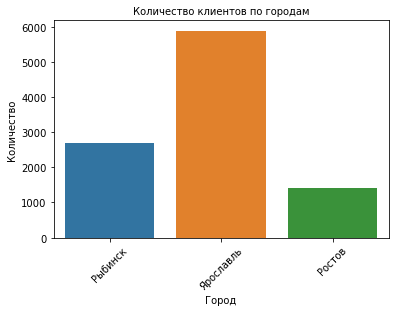

In [11]:
# количество клиентов по городам
display(df['city'].value_counts())
sns.countplot(x = 'city', data = df)
plt.title('Количество клиентов по городам', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Город', fontsize=10)
plt.xticks(rotation= 45)
plt.show()

М    5005
Ж    4995
Name: gender, dtype: int64

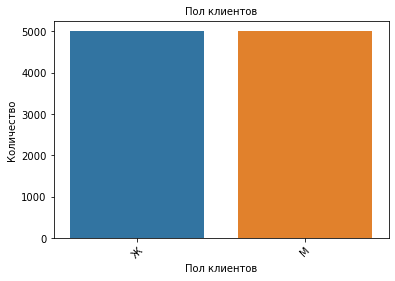

In [12]:
# количество клиентов по полу
display(df['gender'].value_counts())
sns.countplot(x = 'gender', data = df)
plt.title('Пол клиентов', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Пол клиентов', fontsize=10)
plt.xticks(rotation= 45)
plt.show()

In [13]:
# доля оттока
display(df['churn'].value_counts())

0    8180
1    1820
Name: churn, dtype: int64

##### **Выводы по итогам загрузки данных:**

Выборка:

- 10000 строк, 12 столбцов
- видимые пропущенные значения - 23% в столбце balance(баланс на счете) и 0.25% в столбце age(возраст)
- дубликаты не обнаружены, но есть дубликаты по USERID (73 шт.)
- тип данных соответствует содержанию
- в большинстве столбцов данные нормально распределены: среднее отличается от медианы незначительно, а стандартное отклонение невелико, но есть min значение зпл ниже МРОТ - 2546 руб.

Клиенты:

- в выборке 9927 уникальных клиентов 
- средний балл кредитного скоринга равен 848 (score). Вопрос методологии
- половина клиентов у нас из Ярославля (59%), остальные - из Ростова (14%) и Рыбинска (27%). 
- одинаковое распределение по полу
- клиентам от 18 до 86 лет, при этом средний возраст - 42 года 
- средняя оценка equity у клиентов 2.63. Макс кол-во обьектов 9 
- средняя сумма на счете равна 827 тыс. руб. 
- в среднем клиенты пользуются 1-2 продуктами
- с среднем 68% клиентов имеют кредитную карту
- 52% клиентов активны, то есть пользовались нашими продуктами в последнее время (last_action).
- заработная плата в среднем 148000 рублей
- доля оттока 18% (18% клиентов ушли)

Задачи предобработки данных:

- привести названия столбцов к единому виду (нижний регистр)
- разобраться с пропусками (balance, age)
- перевести возраст из float в int
- уточнить дубликаты по USERID (возможно, уточнить по городам - может быть, пользователи переезжали)
- уточнить данные по мин оценочной заработной плате
- для анализа предлагается кодировать столбцы (city и gender): перевести категориальные значения в бинарные
- провести категоризацию данных по столбцам age и score (разбить пользователей на группы)

# <a id="title2">Предобработка данных</a>

Приведем названия к нижнему регистру

In [14]:
df.columns = df.columns.str.lower()
display(df.columns)

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

По пропущенным значениям:
- 26 пропущенных значений по столбцу age предлагается удалить ввиду несущественности
- данные с пропущенными значениями по столбцу balance  правильно оставить ввиду существенности, проанализировать(для анализа посмотреть на возможную связь с показателем оттока, наличием кредитной карты)

In [15]:
# удалим строки с пропусками по age
df = df.dropna(axis='index', how='any', subset=['age'])
display(df.shape)

(9974, 12)

In [16]:
# переведем данные в int
df['age'] = df['age'].astype (int)

In [17]:
# посмотрим на данные по balance
display(df[df['balance'].isna()]['churn'].value_counts())
display(df[df['balance'].isna()]['credit_card'].value_counts())

0    2266
1      13
Name: churn, dtype: int64

1    1858
0     421
Name: credit_card, dtype: int64

Связи с отсутствием данных по счету и оттоком нет (всего 13 клиентов), также как и отстуствие кредитной карты не является показателем (у примерно 4/5 есть кредитные карты). Целесообразно оставить данные, возможно, это техническая ошибка, которую надо уточнить

In [18]:
# пропуски в разрезе других признаков
df.isna().sum ()

userid              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [19]:
# проверка дубликатов по USERID и городу
duplicate_users = df[df.duplicated (['userid', 'city'])]
display(duplicate_users)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


В городах дубля по пользователям нет, нецелесообразно удалять дублирующиеся userid (возможно клиенты меняли место жительства)

In [20]:
# проверка мин уровня зпл с учетом официального МРОТ 16242 руб.
df[df['est_salary']<16242]['userid'].count()

80

Всего 80 клиентов (0.82%) с доходом ниже МРОТ, посмотрим, другие данные по этим клиентам.

In [21]:
df_salary = df.loc[df['est_salary'] < 16242]
display(df_salary.sample(15))

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3491,216842,811.00,Рыбинск,Ж,25,3,112896.03,3,1,0,10685.64,0
4458,153907,777.00,Ярославль,Ж,29,3,190183.61,2,1,1,15674.14,0
9595,183128,799.00,Ростов,Ж,19,6,17202.68,1,1,0,13550.37,0
1125,212017,812.00,Ростов,М,21,1,25514.59,2,1,0,16220.59,0
1700,155567,747.00,Ростов,М,25,0,5750.92,1,1,0,7054.82,0
4335,147040,846.00,Рыбинск,Ж,26,4,220035.65,2,0,0,15202.27,0
8129,95627,831.00,Ростов,М,25,6,208738.82,4,1,1,12945.28,0
5350,166967,856.00,Ростов,М,25,7,256923.38,4,1,1,13616.26,0
8166,179230,984.00,Рыбинск,Ж,67,4,702841.03,2,0,0,11462.92,0
7421,180078,802.00,Рыбинск,Ж,21,0,10105.01,1,1,1,10915.12,0


Клиенты живые(есть отстатки по счетам, банковские продукты), удалять смысла нет. На оценочное отклонение в доходе надо обратить внимание

Переводим категориальные значения в бинарные по столбцам city и gender

In [22]:
df['city_dummies']=df['city']
df['gender_dummies']=df['gender']
display(df.head())

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_dummies,gender_dummies
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,Ярославль,М


In [23]:
df = pd.get_dummies(df, columns = ['city_dummies', 'gender_dummies'])
df = df.rename (
    columns = ({
        'city_dummies_Ростов':'Ростов', 'city_dummies_Рыбинск':'Рыбинск','city_dummies_Ярославль':'Ярославль', 
        'gender_dummies_Ж':'Ж', 'gender_dummies_М':'М'}))
display (df.sample(5))

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
7853,117925,934.00,Ярославль,Ж,40,0,NaN,1,1,1,313597.68,0,0,0,1,1,0
2327,186521,894.00,Ярославль,Ж,65,0,NaN,1,0,1,88722.64,0,0,0,1,1,0
3204,153207,891.00,Рыбинск,М,35,4,513368.35,2,1,1,179603.44,1,0,1,0,0,1
8444,190397,835.00,Ростов,М,38,3,230690.40,1,1,0,214388.69,0,1,0,0,0,1
1793,180706,728.00,Ярославль,М,34,1,63589.24,2,1,0,81008.10,0,0,0,1,0,1


По столбцу age применим категоризацию - разделим пользователей на группы и в дальнейшем будем сравнивать их по группам.

In [24]:
print('Минимальный возраст клиента:', df['age'].min(), 'лет')
print('Максимальный возраст клиента:', df['age'].max(), 'года')

Минимальный возраст клиента: 18 лет
Максимальный возраст клиента: 86 года


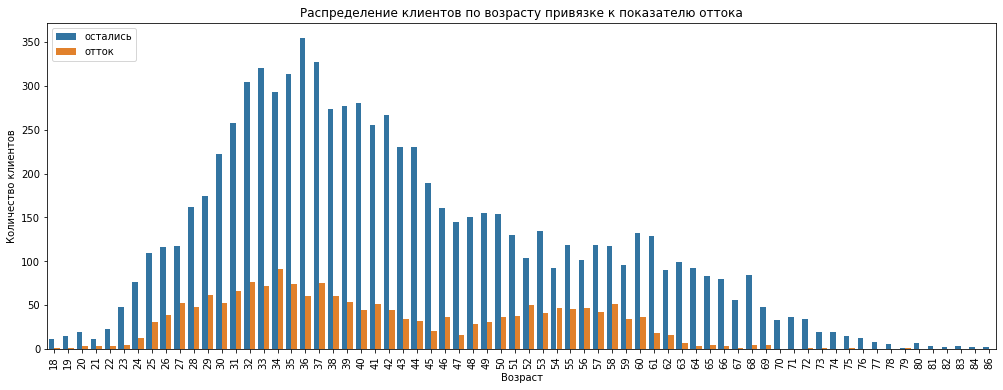

In [25]:
# распределение клиентов по возрасту привязке к показателю оттока:
plt.figure(figsize=(17, 6))
ax=sns.countplot(x = df['age'], hue='churn', data=df)
plt.title('Распределение клиентов по возрасту привязке к показателю оттока', fontsize=12)
plt.xticks(rotation = 90)
ax.set_xlabel("Возраст")
ax.set_ylabel("Количество клиентов")
ax.legend(['остались', 'отток'])
plt.show();

Средний возраст    6411
Взрослые           2547
Пожилые             780
Молодые             236
Name: age_category, dtype: int64

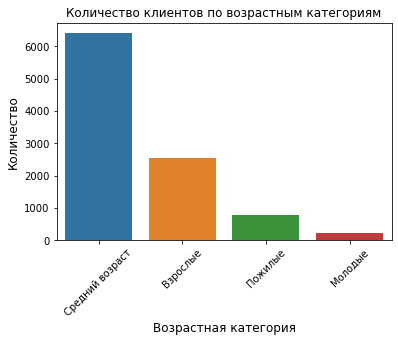

In [26]:
# разделим на возрастные группы примерно в соответствии с графиком
def age_category(data):
    if data['age'] < 25:
        return 'Молодые'
    if data['age'] < 47:
        return 'Средний возраст'
    if data['age'] < 63:
        return 'Взрослые'
    else:
        return 'Пожилые'

# добавим столбец в таблицу
df['age_category'] = df.apply(age_category, axis=1)
display(df['age_category'].value_counts())

# построим график
sns.countplot(x = 'age_category', data = df)
plt.title('Количество клиентов по возрастным категориям', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xlabel('Возрастная категория', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Сгруппируем данные по остаткам на счетах и доходу, предлагаю оценить статистические данные и привязаться к квартилям.

In [27]:
# посмотрим данные по остаткам на счетах, в том числе распределение
display(df['balance'].describe())

count        7695.00
mean       827245.59
std       1980327.41
min             0.00
25%        295698.71
50%        524295.33
75%        980051.21
max     119113552.01
Name: balance, dtype: float64

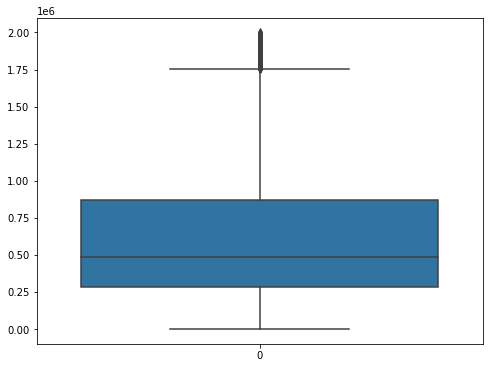

In [28]:
# сделаем диагрмамму разброса, ограничим верхнюю границу 2 млн.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df.query('balance<2000000')['balance'])
plt.show();

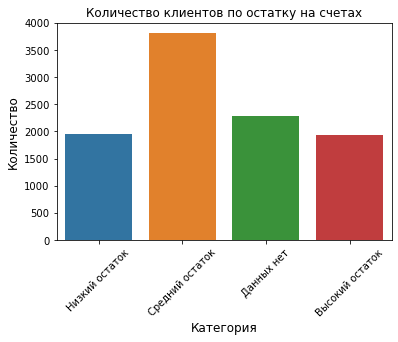

In [29]:
# представляется целесообразным привязаться к квартилям, учтем также отстутсвующие данные
def balance_category(data):
    if str(data['balance']) == 'nan':
        return 'Данных нет'
    
    if data['balance'] <= 300000:
        return 'Низкий остаток'
    
    elif data['balance'] <= 980000:
        return 'Средний остаток'
    
    else:
        return 'Высокий остаток'

# добавим столбец в таблицу
df['balance_category'] = df.apply(balance_category, axis=1)

# график
sns.countplot(x = 'balance_category', data = df)
plt.title('Количество клиентов по остатку на счетах', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xlabel('Категория', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

In [30]:
# посмотрим количество клиентов в группах по остатку на счетах
display(df['balance_category'].value_counts())

Средний остаток    3812
Данных нет         2279
Низкий остаток     1959
Высокий остаток    1924
Name: balance_category, dtype: int64

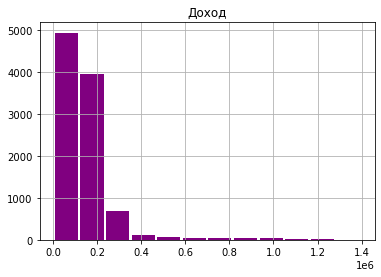

In [31]:
# посторим гистограмму по ходам
df.hist(column='est_salary', bins=12, rwidth= .9 , color='purple',)
plt.title('Доход');

In [32]:
# посмотрим данные по доходам, в том числе распределение
display(df.est_salary.describe())

count      9974.00
mean     147786.81
std      139285.51
min        2546.30
25%       75251.66
50%      119626.79
75%      174499.81
max     1395064.45
Name: est_salary, dtype: float64

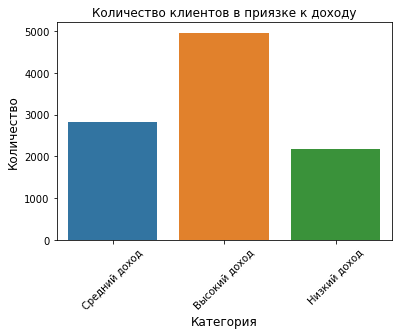

Высокий доход    4961
Средний доход    2833
Низкий доход     2180
Name: est_salary_category, dtype: int64

In [33]:
# представляется целесообразным привязаться к квартилям
def est_salary(data):
    
    if data['est_salary'] <= 70000:
        return 'Низкий доход'
    
    elif data['est_salary'] <= 120000:
        return 'Средний доход'
    
    else:
        return 'Высокий доход'

# добавим столбец в таблицу
df['est_salary_category'] = df.apply(est_salary, axis=1)

# график
sns.countplot(x = 'est_salary_category', data = df)
plt.title('Количество клиентов в приязке к доходу', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xlabel('Категория', fontsize=12)
plt.xticks(rotation = 45)
plt.show()
# посмотрим количество клиентов в группах
display(df['est_salary_category'].value_counts())

In [34]:
# кодируем полученные категориальные значения для последующего расчета корреляции
df['age_category_dummies']=df['age_category']

In [35]:
df = pd.get_dummies(df, columns = ['age_category_dummies'])
df = df.rename (
    columns = ({
        'age_category_dummies_Молодые':'Молодые',
        'age_category_dummies_Средний возраст':'Средний возраст',
        'age_category_dummies_Взрослые':'Взрослые',
        'age_category_dummies_Пожилые':'Пожилые'
    })
)

display (df.head())

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М,age_category,balance_category,est_salary_category,Взрослые,Молодые,Пожилые,Средний возраст
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,Средний возраст,Низкий остаток,Средний доход,0,0,0,1
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,Средний возраст,Средний остаток,Средний доход,0,0,0,1
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,Средний возраст,Данных нет,Средний доход,0,0,0,1
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,Взрослые,Высокий остаток,Высокий доход,1,0,0,0
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,Средний возраст,Низкий остаток,Низкий доход,0,0,0,1


In [36]:
# проверим наличие пользователей с количесвом продуктов рынвым 0
display(df.query('products==0'))

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М,age_category,balance_category,est_salary_category,Взрослые,Молодые,Пожилые,Средний возраст
8957,147837,962.00,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1,0,1,0,1,0,Пожилые,Данных нет,Низкий доход,0,0,1,0


**Выводы по предобработке данных:**
- перевели названия столбцов в нижний регистр
- сократили строки с пропущенными значеними по возрасту (осталось строк 9974)
- дубликаты не по userid и пропуски по balance сокращать нет оснований (по balance, возможно, это техническая ошибка)
- разбили на возрастные группы, привязавшись к диаграмме оттока
- перевели категориальные значения в бинарные по столбцам пол, город и по, вновь созданному, возрастная категория
- есть 1 клиент с 0 продуктов, удалять не стал - есть оценка доходов от банка, есть высокий рейтинг, возможно, это живой клиент с пенсией

 # <a id="title3">Исследовательский анализ данных</a>

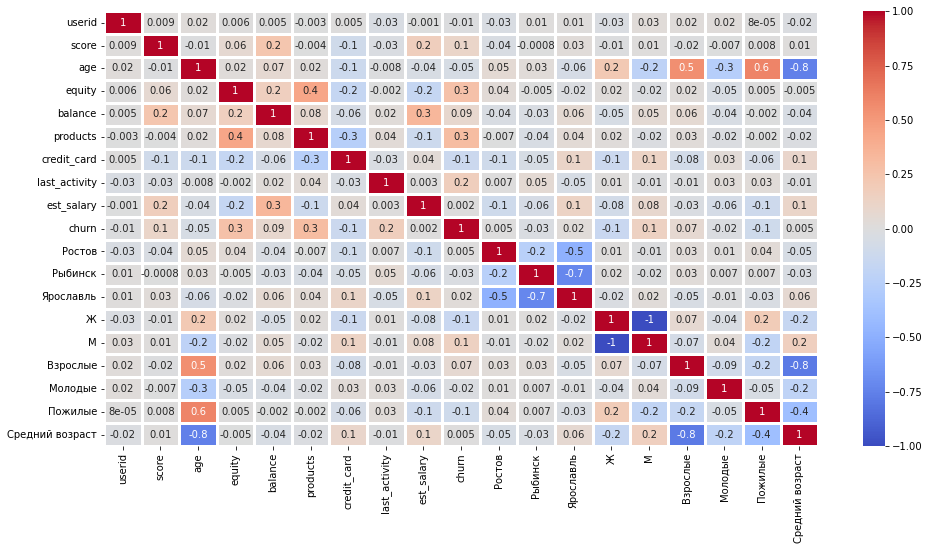

In [37]:
# корреляция оттока данных с другими признаками
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=3, fmt='.1g' ) # square=True)
plt.show()

In [38]:
# сделаем корреляцию по одному столбцу
ax=df.corr()['churn'].sort_values(ascending=False)
display(ax)

churn              1.00
products           0.30
equity             0.27
last_activity      0.17
М                  0.14
score              0.11
balance            0.09
Взрослые           0.07
Ярославль          0.02
Ростов             0.01
Средний возраст    0.00
est_salary         0.00
userid            -0.01
Молодые           -0.02
Рыбинск           -0.03
age               -0.05
Пожилые           -0.11
credit_card       -0.13
Ж                 -0.14
Name: churn, dtype: float64

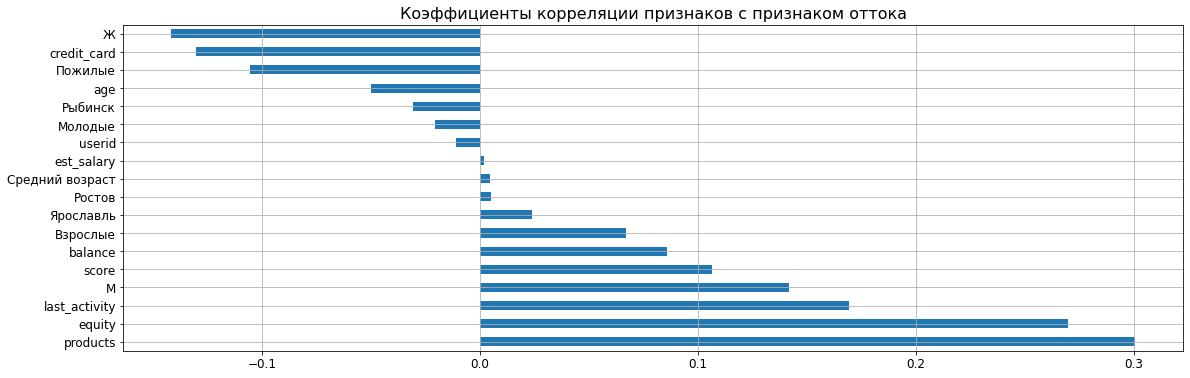

In [39]:
ax.drop(index = 'churn').plot(
    kind = 'barh', figsize = (19,6), legend = False, fontsize = 12, grid=True
).set_title('Коэффициенты корреляции признаков с признаком оттока', fontsize = 16);

Существует слабая (менее 0.3) корреляция с показателем оттока клиентов у следующих метрик:
- количество продуктов, которыми пользуется клиент (products) 0.3
- оценка объектов собственности клиента (equity) 0.27
- активность пользователя (last_activity) 0.17
- мужской пол 0.14
- скоринговый рейтинг клиента (score) 0.11

Обратная корреляция:
- женский пол -0.14
- наличие кредитной карты (credit_card) -0.13
- клиенты группы "Пожилые" -0.11


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [40]:
display(df.groupby('churn').agg('mean').T)

churn,0,1
userid,171928.11,170980.10
score,845.40,863.42
age,43.02,41.45
equity,2.38,3.76
balance,733031.63,1134458.21
products,1.76,2.38
credit_card,0.71,0.55
last_activity,0.48,0.70
est_salary,147674.64,148289.70
Ростов,0.14,0.15


Есть видимая разница в equity, остатке на счету(balance), пол(М,Ж), категории "Взрослые", наличии кредитной карты и количеству продуктов. Построим графики по набору признаков в привязке к churn и % ушедших в привязке к признакам.

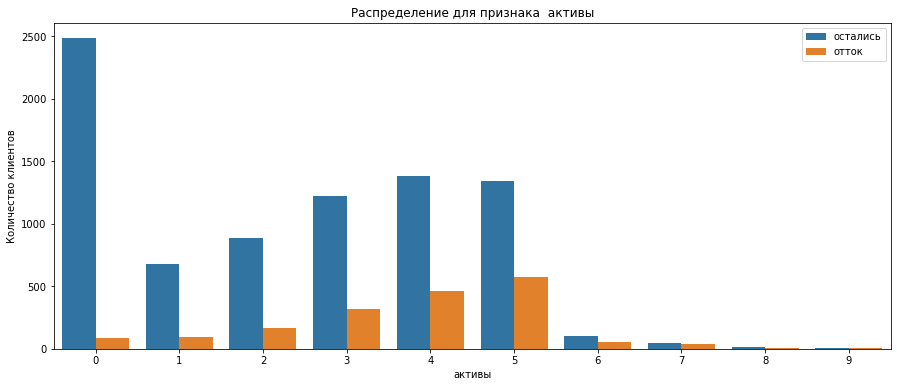

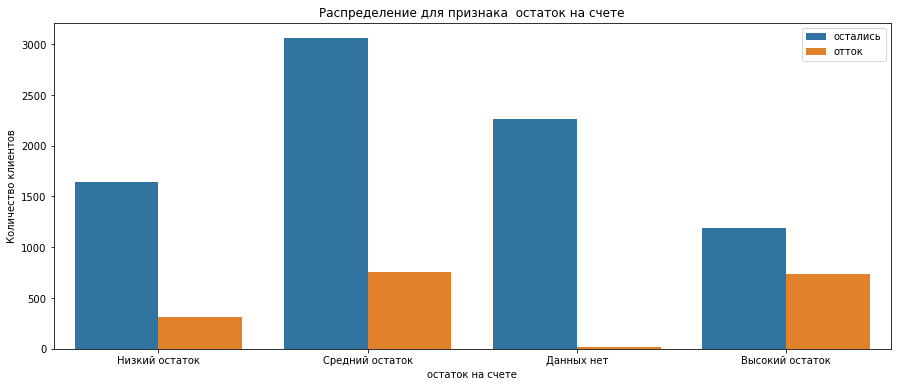

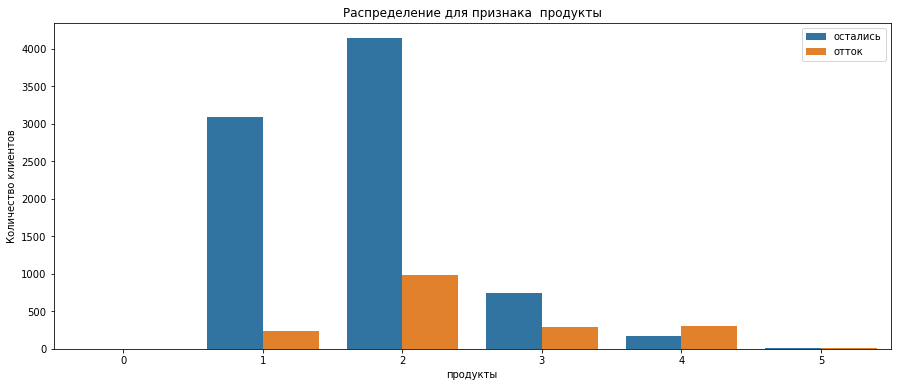

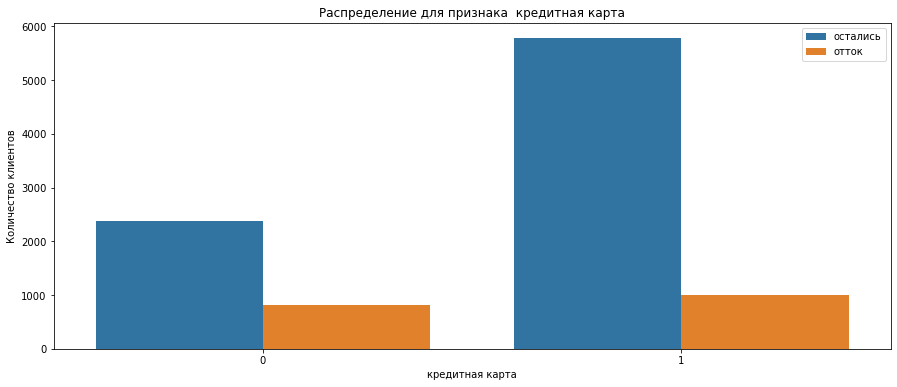

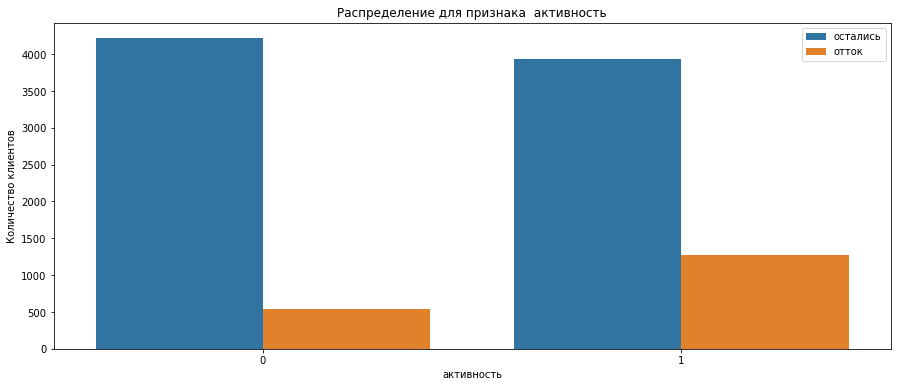

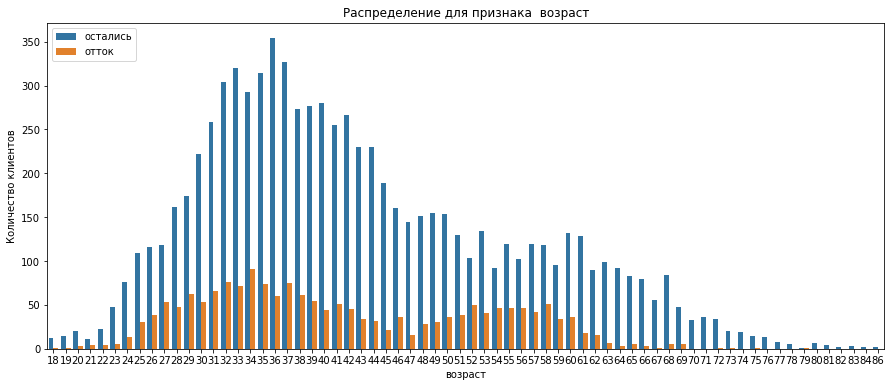

In [41]:
column_dict = {
        'equity':'активы','balance_category':'остаток на счете','products':'продукты',
        'credit_card':'кредитная карта','last_activity':'активность', 'age':'возраст'}
for column in (
    'equity','balance_category','products','credit_card',
    'last_activity', 'age'
):
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x = df[column], hue='churn', data=df)
    plt.title('Распределение для признака ' + ' ' + column_dict[column], fontsize=12)
    ax.set_ylabel("Количество клиентов")
    ax.set_xlabel(column_dict[column])
    ax.legend(['остались', 'отток'])
    plt.show()

,sum,count,perc
city,,,
Ростов,265,1416,18.71
Рыбинск,437,2683,16.29
Ярославль,1117,5875,19.01


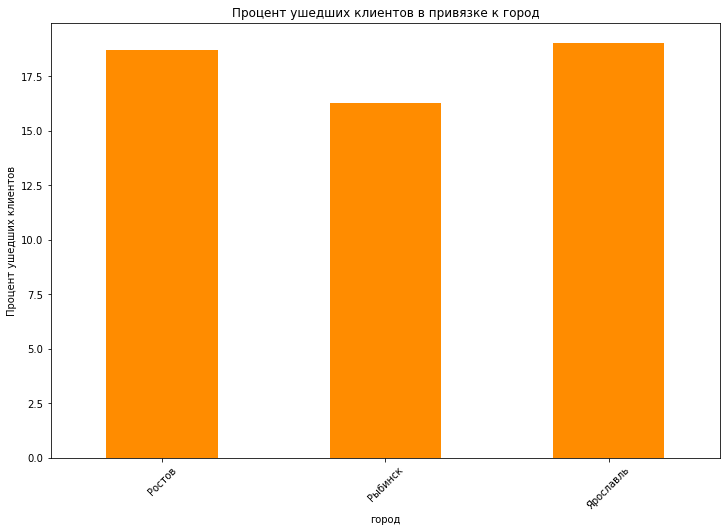

,sum,count,perc
gender,,,
Ж,636,4983,12.76
М,1183,4991,23.70


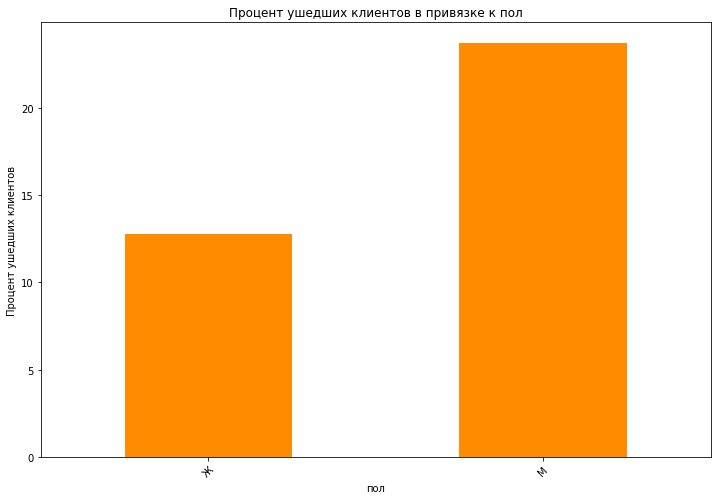

,sum,count,perc
age_category,,,
Взрослые,577,2547,22.65
Молодые,31,236,13.14
Пожилые,33,780,4.23
Средний возраст,1178,6411,18.37


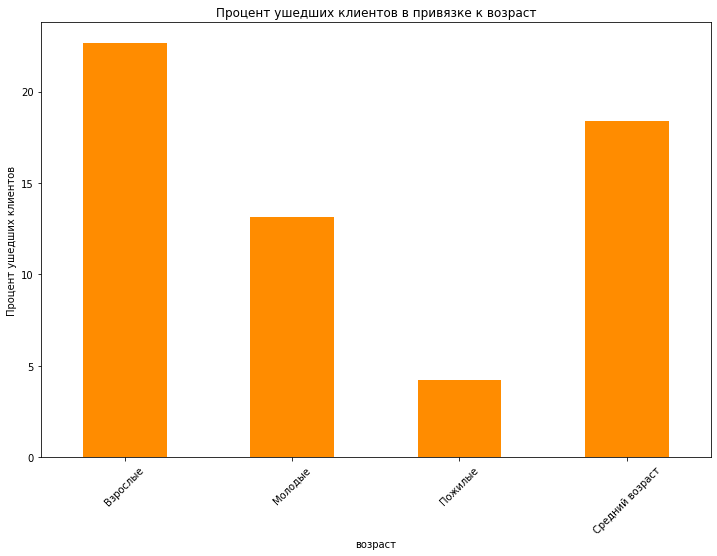

,sum,count,perc
equity,,,
0,90,2576,3.49
1,93,773,12.03
2,166,1051,15.79
3,322,1541,20.90
4,464,1847,25.12
5,576,1915,30.08
6,58,161,36.02
7,37,80,46.25
8,6,17,35.29


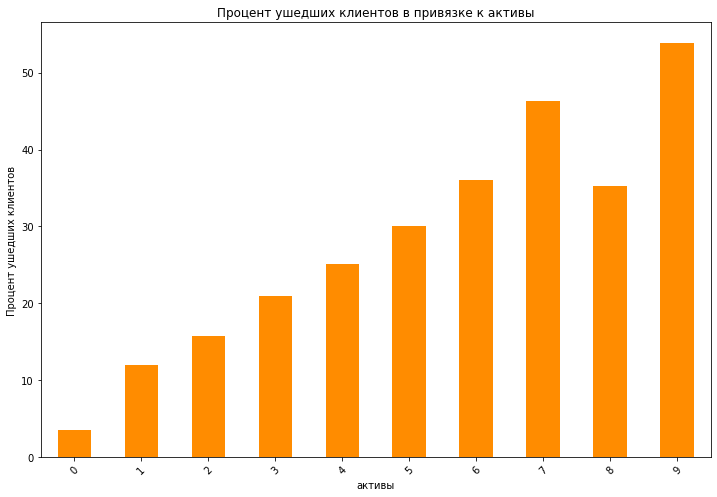

,sum,count,perc
balance_category,,,
Высокий остаток,738,1924,38.36
Данных нет,13,2279,0.57
Низкий остаток,316,1959,16.13
Средний остаток,752,3812,19.73


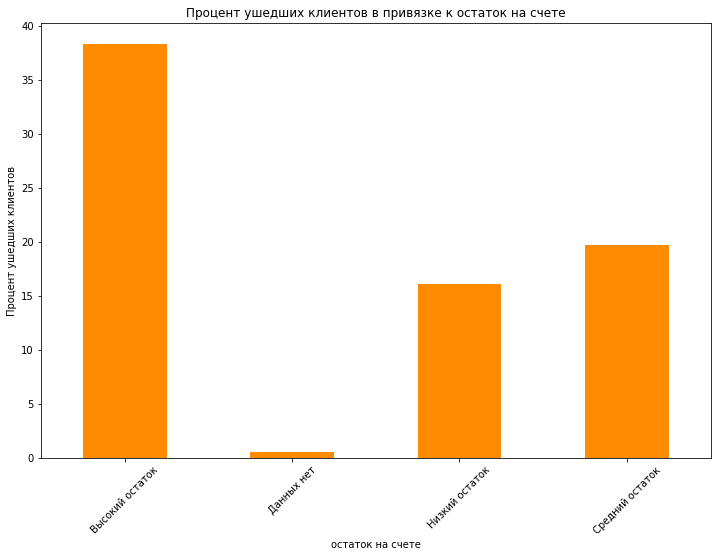

,sum,count,perc
score,,,
706.00,1,11,9.09
707.00,1,6,16.67
727.00,1,12,8.33
728.00,1,9,11.11
730.00,1,8,12.50
733.00,1,14,7.14
736.00,1,8,12.50
737.00,1,13,7.69
739.00,1,15,6.67


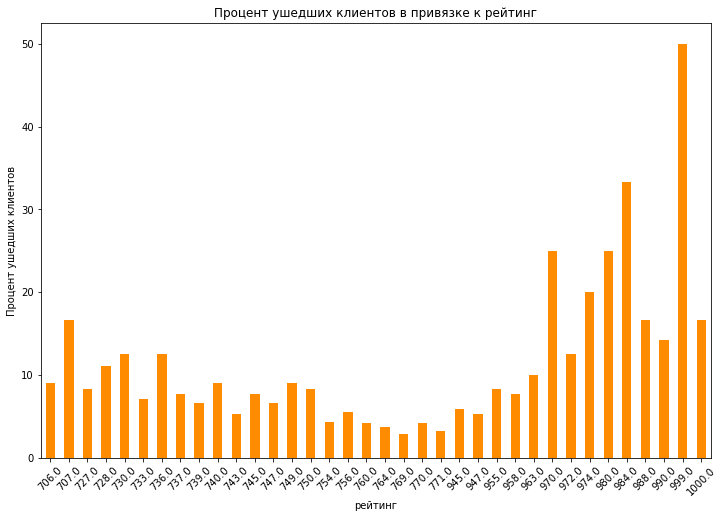

,sum,count,perc
est_salary_category,,,
Высокий доход,965,4961,19.45
Низкий доход,321,2180,14.72
Средний доход,533,2833,18.81


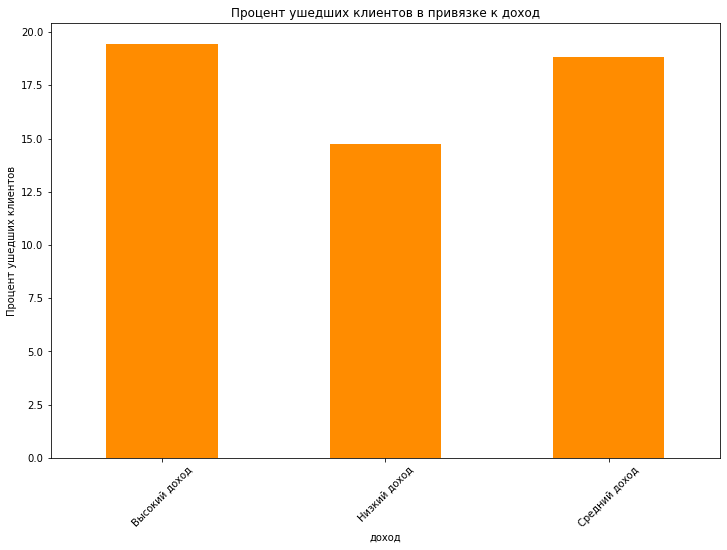

,sum,count,perc
products,,,
0,1,1,100.00
1,235,3323,7.07
2,978,5119,19.11
3,297,1038,28.61
4,300,474,63.29
5,8,19,42.11


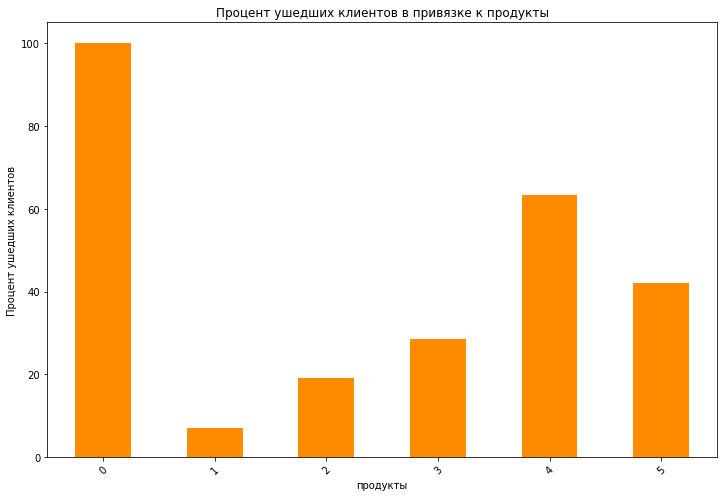

,sum,count,perc
credit_card,,,
0,816,3190,25.58
1,1003,6784,14.78


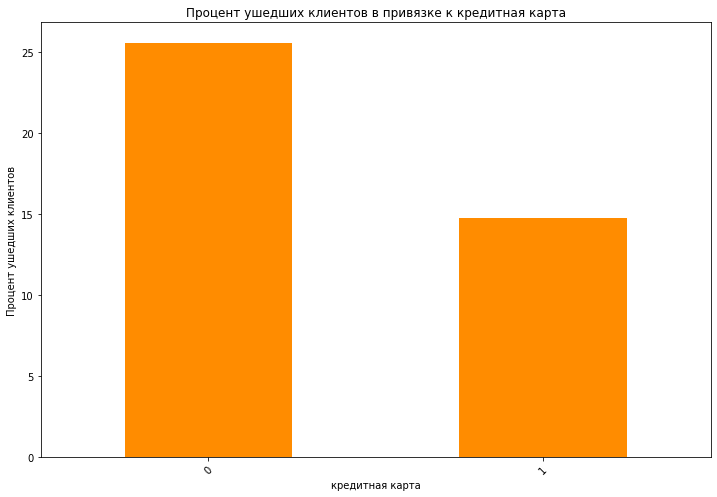

,sum,count,perc
last_activity,,,
0,542,4759,11.39
1,1277,5215,24.49


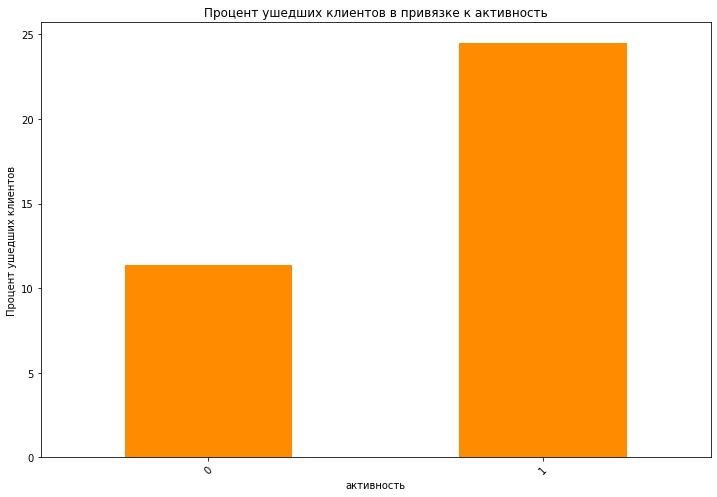

In [42]:
# средний процент по уходящим клиентам
column_dict = {
        'equity':'активы','balance_category':'остаток на счете','products':'продукты',
        'credit_card':'кредитная карта','last_activity':'активность', 'age':'возраст',
        'gender':'пол', 'city':'город', 'score':'рейтинг', 'age_category':'возраст',
        'est_salary_category':'доход'
}
for column in (
    'city', 'gender', 'age_category', 'equity', 'balance_category', 'score',
    'est_salary_category', 'products', 'credit_card', 'last_activity'
):
    pivot = df.pivot_table (index = column, values = 'churn', aggfunc = ['sum', 'count'])
    pivot.columns = pivot.columns.droplevel(level=1)
    pivot ['perc'] = pivot['sum']/pivot['count']*100
    if column == 'score':
        pivot = pivot [pivot['sum']==1] # укрупним шаги

    display(pivot)
    pivot['perc'].plot(
        kind='bar', title = f'Процент ушедших клиентов в привязке к {column_dict[column]}',
        xlabel = column_dict[column], rot=45, ylabel = 'Процент ушедших клиентов', figsize = (12,8), color = 'darkorange')
    plt.show()

**Построим диаграммы размаха по возрасту и доходу, остаткам на счетах, рейтингу**

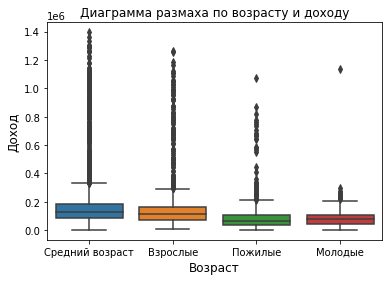

In [43]:
# построим диаграмму размаха по возрасту и доходу
ax = sns.boxplot(x = 'age_category', y = 'est_salary', data = df)
plt.title('Диаграмма размаха по возрасту и доходу', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.xlabel('Возраст', fontsize=12)
plt.show()

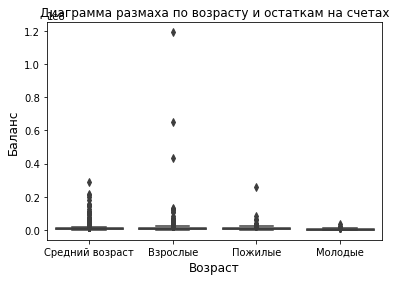

In [44]:
# построим график
ax = sns.boxplot(x = 'age_category', y = 'balance', data = df)
plt.title('Диаграмма размаха по возрасту и остаткам на счетах', fontsize=12)
plt.ylabel('Баланс', fontsize=12)
plt.xlabel('Возраст', fontsize=12)
plt.show()

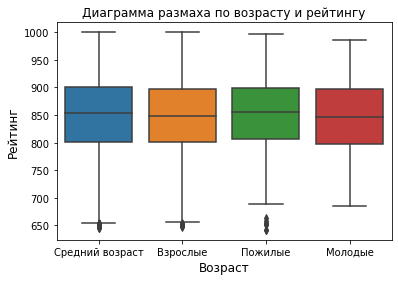

In [45]:
# построим график
ax = sns.boxplot(x = 'age_category', y = 'score', data = df)
plt.title('Диаграмма размаха по возрасту и рейтингу', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.xlabel('Возраст', fontsize=12)
plt.show()

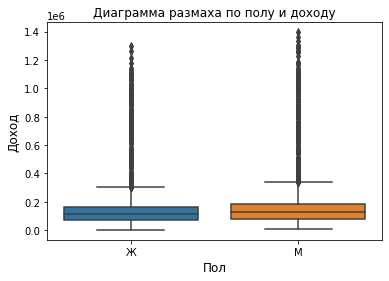

In [46]:
# построим график
ax = sns.boxplot(x = 'gender', y = 'est_salary', data = df)
plt.title('Диаграмма размаха по полу и доходу', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.xlabel('Пол', fontsize=12)
plt.show()

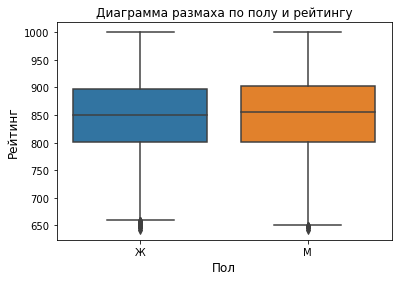

In [47]:
# построим график
ax = sns.boxplot(x = 'gender', y = 'score', data = df)
plt.title('Диаграмма размаха по полу и рейтингу', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.xlabel('Пол', fontsize=12)
plt.show()

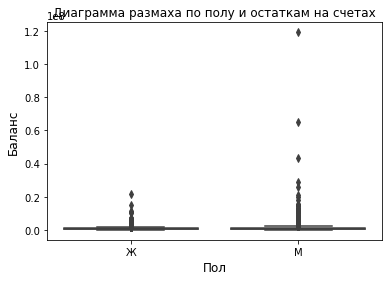

In [48]:
ax = sns.boxplot(x = 'gender', y = 'balance', data = df)
plt.title('Диаграмма размаха по полу и остаткам на счетах', fontsize=12)
plt.ylabel('Баланс', fontsize=12)
plt.xlabel('Пол', fontsize=12)
plt.show()

Выводы:

Предварительно, из визуалиции видно:

- с ростом обьектов в equity растет процент уходящих клиентов
- с ростом score растет процент уходящих клиентов
- с ростом используемых продуктов (products) растет %% оттока (100% ушедших клиентов с 0 продуктов - это 1 клиент)
- отток у клиентов без карты выше, чем у клиентов с картой (но это понятно, чтобы уйти надо погасить долг по карте, это лишнее "движение" для клиента 
- у активных клиентов риск оттока выше, чем у неактивных
- клиенты мужчины более склолнны к уходу чем женщины
- по возрасту - лидер по оттоку "Взрослые", следующие "Средний возраст". Но, данный показатель не  явялется корректным, так как клиентов в этих возрастных катеогриях больше

Диаграммы размаха показывают, что доходы у категорий "Взрослые", "Средний возраст" выше. Рейтинги и остактки по счетам у всех групп по возрасту и полу примерно одинаковые.

Выглядит, что  к уходу склонны клиенты со следующими признаками - более активные клиенты, мужчины, взаимодействующие с банком, среднего и взрослого возраста, с высоким рейтингом и нескольким количествами обьектов в equity. Построим еще ряд визуализаций с помощью heatmap для определения портрета клиента

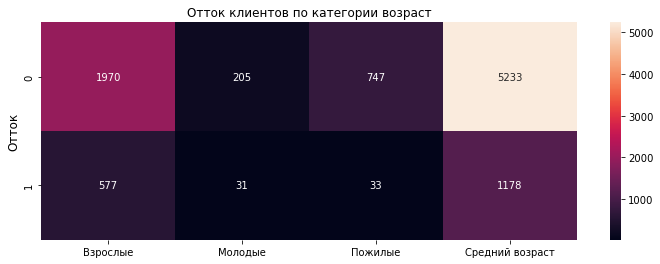

In [49]:
# возраст
age_category_data = df.pivot_table(index='churn', columns='age_category', values='userid', aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(age_category_data, annot=True, fmt='.0f')
plt.title('Отток клиентов по категории возраст')
plt.ylabel('Отток', fontsize=12)
plt.xlabel('', fontsize=12) # уберем название, чтобы проще разместить графики в презентации
plt.show()

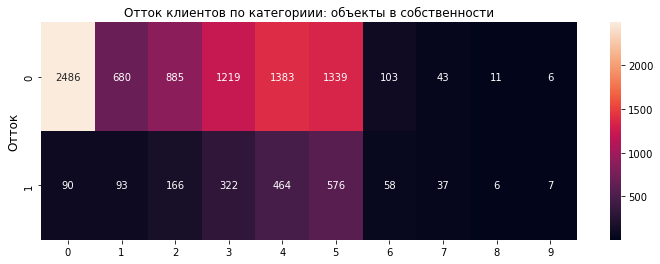

In [50]:
# активы
equity_data = df.pivot_table(index='churn',columns='equity',values='userid',aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(equity_data, annot=True, fmt='.0f')
plt.title('Отток клиентов по категориии: объекты в собственности')
plt.ylabel('Отток', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

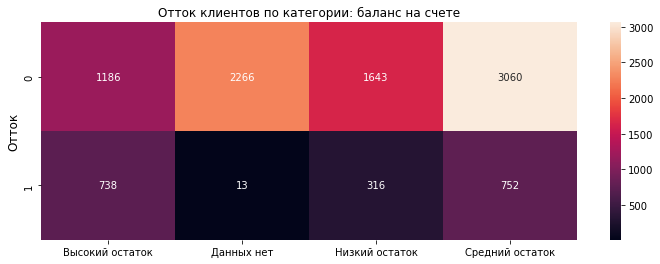

In [51]:
# остаток на счете
balance_category_data = df.pivot_table(index='churn', columns='balance_category', values='userid', aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(balance_category_data, annot=True, fmt='.0f')
plt.title('Отток клиентов по категории: баланс на счете')
plt.ylabel('Отток', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

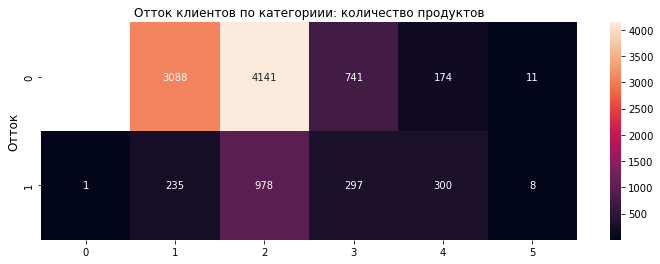

In [52]:
# продукты
products_data = df.pivot_table(index='churn',columns='products',values='userid',aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(products_data, annot=True, fmt='.0f')
plt.title('Отток клиентов по категориии: количество продуктов')
plt.ylabel('Отток', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

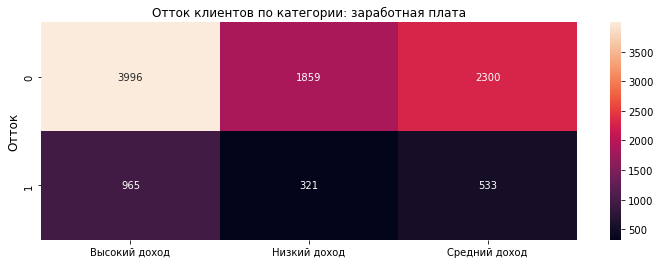

In [53]:
# доходы
est_salary_category_data = df.pivot_table(index='churn', columns='est_salary_category', values='userid', aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(est_salary_category_data, annot=True, fmt='.0f')
plt.ylabel('Отток', fontsize=12)
plt.xlabel('', fontsize=12)
plt.title('Отток клиентов по категории: заработная плата')
plt.show()

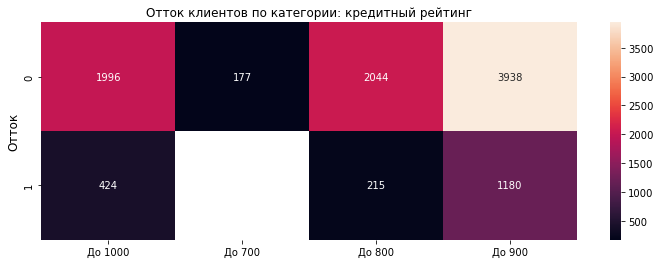

In [54]:
# рейтинг
def score_category(data):
    if data['score'] <= 700:
        return 'До 700'
    elif data['score'] <= 800:
        return 'До 800'
    elif data['score'] <= 900:
        return 'До 900'
    elif data['score'] <= 1000:
        return 'До 1000'
df['score_category'] = df.apply(score_category, axis=1)
score_data = df.pivot_table(index='churn', columns='score_category', values='userid', aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(score_data, annot=True, fmt='.0f')
plt.title('Отток клиентов по категории: кредитный рейтинг')
plt.ylabel('Отток', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

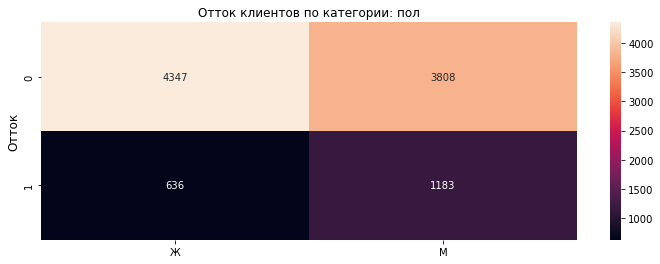

In [55]:
# женщины
gender_data = df.pivot_table(index='churn', columns='gender', values='userid', aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(gender_data, annot=True, fmt='.0f')
plt.title('Отток клиентов по категории: пол')
plt.ylabel('Отток', fontsize=12)
plt.xlabel('', fontsize=12)
plt.show()

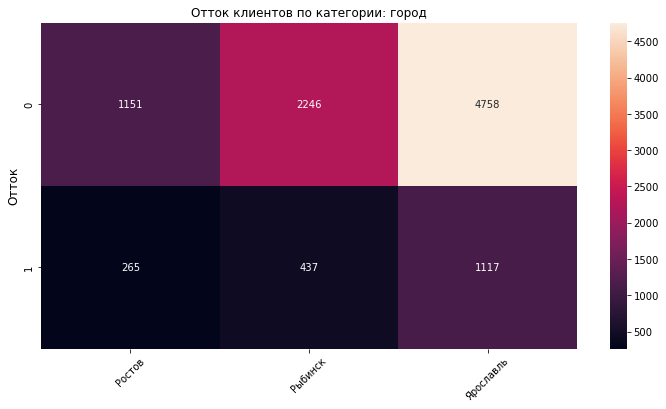

In [56]:
# city
city_data = df.pivot_table(index='churn', columns=('city'), values='userid', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(city_data, annot=True, fmt='.0f')
plt.title('Отток клиентов по категории: город')
plt.ylabel('Отток', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

**Общие выводы по разделу исследовательский анализ:**

- по признаку возраст самый высокий процент оттока в категориях "Средний возраст" и "Взрослые" - 15 и 20%%, соответственно
- по признаку активы(equity) самый низкий процент оттока у клеинтов с equity 0-1, чем выше количество обьектов тем выше процент оттока
- по признаку остаток на счете % оттока примерно одинаковый, в катеогрии стредний остаток он примерно на 5% выше (примерно 20% против 15% по остальным двум группам)
- по признаку количество продуктов (products) - чем выше количество продуктов,тем выше отток - в категории 3 продукта отток 45%, а в категории 4 продуктов отток к оставшимся почти два к одному,  при одном продукте  - отток примерно 10%
- по признаку est_salary - чем выше доход, тем выше отток - примерно 20% в категории высокий доход и 14% в категории низкий доход
- по признаку кредитный рейтинг(score) - относительно высокий отток при рейтинге от 800 до 900 - 20% и рейтинге до 1000 - 15%, в более низкой категории до 800 - 10 и ниже процентов
- отток среди мужчин выше чем у женщин - 20% против примерно 14%

Как уже говорилось выше, сильной корреляции факта оттока (churn - наша целевая переменная) с другими признаками не обнаружено, но есть взаимозависимость фактора оттока с признаком *score - коэффициент корреляции равен 0.11, equity - активы 0.27, products - количество продуктов 0.3, last_activity - активность 0.17, и пол (женщины  -0.14, мужчины 0.14). Для остальных признаков характерна еще более слабая корреляция с целевой переменной.*

Анализ данных не выявил очевидного признака, влияющего на склонность клиентов к оттоку. Признаки, имеющие нулевую корреляцию с целевой переменной также отстутсвуют. Повторим - к уходу склонны клиенты со следующими признаками - более активные клиенты, мужчины, взаимодействующие с банком, среднего и взрослого возраста, с высоким рейтингом, несколькими продуктами и количеством обьектов в equity больше 2-х. Более активный отток в Ярославле и Ростове. В Ярославле самое большое количество клиентов.

**Проведем дополнительный анализ клиентов с целью формирования групп для дальнейшего анализа:**

Общее количество клиентов в оттоке примерно 1800 человек. Объединим некторое количество выявленнных выше коррелирующих признаков, чтобы сформировать общую группу, формирующую 80% этого количества - это примерно 1450 чел.

In [57]:
# ограничение по активности
display(len(df.query('last_activity==1&churn==1')))

1277

In [58]:
# ограничение по products
display(len(df.query('products>1&churn==1')))

1583

In [59]:
# ограничение по equity
display(len(df.query('equity>1&churn==1')))

1636

In [60]:
# ограничение по score
display(len(df.query('score>800&churn==1')))

1604

In [61]:
# ограничение по 3-м признакам: equity, количество продуктов, рейтинг>700
display(len(df.query('equity>1&products>1&score>700&churn==1')))

1454

In [62]:
# ограничение по 3-м признакам: активы, количество продуктов, рейтинг>800
display(len(df.query('equity>1&products>1&score>800&churn==1')))

1324

Наиболее близкая по количеству группа, ограниченная по 3-м признакам: активы, количество продуктов, рейтинг> 700 - 1454 чел. Ограничение по активности дает совсем малу группу - 1272 чел., ограничение только по одному из признаков брать не совсем корректно(не учитываются дургие влияющие признаки) 

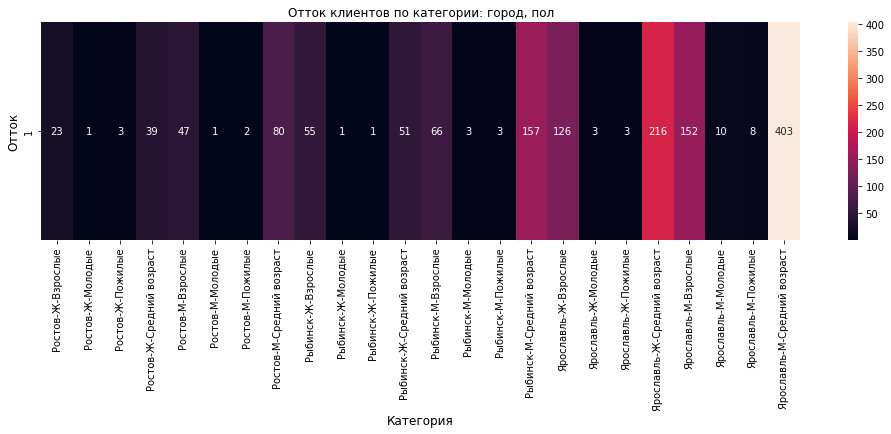

In [63]:
general_data = df.query(
    'equity>1&products>1&score>700&churn==1'
).pivot_table(
    index='churn', columns=('city', 'gender', 'age_category'), values='userid', aggfunc='count'
)
plt.figure(figsize=(17, 4))
sns.heatmap(general_data, annot=True, fmt='.0f')
plt.title('Отток клиентов по категории: город, пол')
plt.ylabel('Отток', fontsize=12)
plt.xlabel('Категория', fontsize=12)
# plt.xticks(rotation = 45)
plt.show()

# Группы клиентов

До формирования более детальных портретов клиентов, склонных к уходу, сформируем три группы. Это позволит уйти от работы с малыми цифрами, оценить общую картину и, после проверки гипотез, сделать более детальную работу по описанию портретов. Сформируем следующие группы:

- Активные: клиенты среднего и взрослого возраста, с equity, products > 1 и score > 700
- Молодые и пожилые клиенты
- Остальные

Оценим отток в этих группах

In [64]:
# группа активные
active_clients = df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1'
)['userid'].count()
active_clients_churn_rate = df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&churn==1'
)['userid'].count()/ active_clients
print ('Активные: количество {}, доля оттока в группе {:.2%}'.format(active_clients, active_clients_churn_rate))

# группа молодые и пожилые
young_elders = df.query (
    'age_category.isin(["Молодые", "Пожилые"])'
)['userid'].count()
young_elders_churn_rate = df.query (
    'age_category.isin(["Молодые", "Пожилые"])&churn==1'
)['userid'].count()/young_elders
print ('Молодые, пожилые: количество {}, доля оттока в группе {:.2%}'.format(young_elders, young_elders_churn_rate))

# группа остальные
others = df.query(
    'age_category.isin(["Взрослые", "Средний возраст"])&(equity<=1|score<=700|products<=1)'
)['userid'].count()
others_churn_rate = df.query(
    'age_category.isin(["Взрослые", "Средний возраст"])&(equity<=1|score<=700|products<=1)&churn==1'
)['userid'].count()/others
print ('Остальные: количество {}, доля оттока в группе {:.2%}'.format(others, others_churn_rate))

Активные: количество 4944, доля оттока в группе 28.62%
Молодые, пожилые: количество 1016, доля оттока в группе 6.30%
Остальные: количество 4014, доля оттока в группе 8.47%


In [65]:
#остатки по счетам в активной группе клиентов
active_clients_balance = df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1'
)['balance'].sum()
share_balance = active_clients_balance/df['balance'].sum()
print('Сумма остатков по счету активных клиентов {} и доля в общем остатке {:.2%}'.format(active_clients_balance, share_balance))

Сумма остатков по счету активных клиентов 4854163999.12 и доля в общем остатке 76.26%


**Выводы:**

Видно, что группа Активные, составляющая примерно 50% общей численности более склонна к оттоку. У клиентов с низким рейтингом equity отток 8.5% при численности в 40% от общего количества, группа молодых и пожилых клиентов характеризуется низким оттоком и составляет примерно 10% от общей численности.

остатки по счетам активных клиентов - 76% от общих остатков

Нет данных по рынку, поэтому сложно сказать, почему нет задачи увеличить группу молодых и пожилых.

# <a id="title4">Статистический анализ данных</a>

Формулировка и проверка трех статистических гипотез (третья из которых, в принципе, подтверждена анализом выше):

- Гипотеза различия в наличии или отсутствии кредитной карты у ушедших и оставшихся клиентов
- Гипотеза различия дохода между ушедшими и оставшимися клиентами
- Гипотеза о различии возраста между между ушедшими и оставшимися клиентами
- Гипотезу между активностью клиентов ушедших в отток и оставшихся нет статистически значимых различий

**Гипотеза № 1 Различие в наличии или отсутствии кредитной карты у ушедших и оставшихся клиентов**

Сформулируем нулевую и альтернативную гипотезы:

- **H₀:** среднее количество кредитных карт у оставшихся и отточных клиентов равны
- **H₁:** среднее количество кредитных карт у оставшихся и отточных клиентов не равны

Для проверки гипотезы проведем **t-test:**

In [66]:
# предположение является ли кредитная карта удерживающим от оттока признаком
print('Доля клиентов с кр картой в оттоке {:.2%}'.format(len(df.query('credit_card==1&churn==1'))/len(df.query('churn==1'))))
print('Доля клиентов с кр картой в общем числе клиентов {:.2%}'.format(len(df.query('credit_card==1'))/len(df)))

Доля клиентов с кр картой в оттоке 55.14%
Доля клиентов с кр картой в общем числе клиентов 68.02%


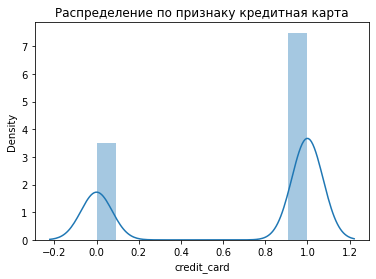

In [67]:
sns_plot = sns.distplot(df['credit_card'])
fig = sns_plot.get_figure()
plt.title('Распределение по признаку кредитная карта')
plt.show()

Используем **ttest**. Условия применения: Сравниваемые значения не составляют пару коррелирующих значений Распределение признаков в каждой выборке соответствует нормальному распределению.

In [68]:
results = st.ttest_ind (
    df[df['churn']==0]['credit_card'],
    df[df['churn']==1]['credit_card'],
    equal_var = False
)
alpha = 0.05  # критический уровень статистической значимости
print ('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение:  2.5969413470601326e-34
Отвергаем нулевую гипотезу


Как и предполагалось выше - клиенты с кредитной картой менее склонны к уходу

**Гипотеза № 2 Различия дохода между ушедшими и оставшимися клиентами**

Сформулируем нулевую и альтернативную гипотезы:

- **H₀:** между доходом клиентов, которые ушли и которые остались нет статистически значимых различий
- **H₁:** между доходом клиентов, которые ушли и которые остались есть статистически значимые различия

С учетом анализа выше - визуально зависимости не было видно, поэтому проведем доп. анализ посмотрим не распределение дохода:

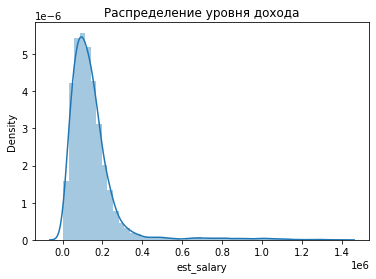

In [69]:
# распределение уровня дохода
sns_plot = sns.distplot(df['est_salary'])
fig = sns_plot.get_figure()
plt.title('Распределение уровня дохода')
plt.show()

Распределение приближено к нормальному c выбросом по высоким доходам. Проведем **t-test**

In [70]:
results = st.ttest_ind (
    df[df['churn']==0]['est_salary'],
    df[df['churn']==1]['est_salary'],
    equal_var = False
)
alpha = 0.05
print ('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.8515799588935961
Не получилось отвергнуть нулевую гипотезу


Посмотрим средние и медианные значения:

In [71]:
# средние значения
print('Среднее значение дохода у отточных клиентов:', df[df['churn']==1]['est_salary'].mean())
print('Среднее значение дохода у остальных клиентов:', df[df['churn']==0]['est_salary'].mean())

# медианные значения
print('Медианное значение дохода у отточных клиентов:', df[df['churn']==1]['est_salary'].median())
print('Медианное значение дохода у остальных клиентов:', df[df['churn']==0]['est_salary'].median())

Среднее значение дохода у отточных клиентов: 148289.70222100036
Среднее значение дохода у остальных клиентов: 147674.63788105454
Медианное значение дохода у отточных клиентов: 125395.22
Медианное значение дохода у остальных клиентов: 118227.6


Отвергаем нулевую гипотезу, влияние величины дохода на отток не прослеживается.

**Гипотеза № 3 О различии возраста между между ушедшими и оставшимися клиентами**

Сформулируем нулевую и альтернативную гипотезы:

- **H₀:** между возрастом клиентов ушедших в отток и оставшихся нет статистически значимых различий
- **H₁:** Между возрастом клиентов ушедших в отток и оставшихся есть статистически значимые различия

In [72]:
results = st.ttest_ind (
    df[df['churn']==0]['age'],
    df[df['churn']==1]['age'],
    equal_var = False
)
alpha = 0.05
print ('p-значение: ', results.pvalue) 
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.1721656853879547e-07
Отвергаем нулевую гипотезу


Подтвердили сделанный выше анализ - разница статистически значима.

**Гипотеза № 4 Между активностью клиентов ушедших в отток и оставшихся нет статистически значимых различий**

Сформулируем нулевую и альтернативную гипотезы:

- **H₀:** между активностью клиентов ушедших в отток и оставшихся нет статистически значимых различий
- **H₁:** Между активностью клиентов ушедших в отток и оставшихся есть статистически значимые различия

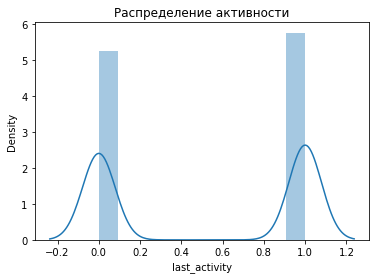

In [73]:
# распределение активности
sns_plot = sns.distplot(df['last_activity'])
fig = sns_plot.get_figure()
plt.title('Распределение активности')
plt.show()

Используем более чувствительный U-критерий Манна-Уитни (Mann–Whitney U-test).

In [74]:
results = st.mannwhitneyu(
    df[df['churn']==1]['last_activity'],
    df[df['churn']==0]['last_activity']
)
alpha = 0.05
print ('p-значение: ', results.pvalue) 
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение:  3.251910844095688e-64
Отвергаем нулевую гипотезу


**Выводы:**
- отвергли гипотезу: среднее количество кредитных карт у оставшихся и отточных клиентов равны
- не получилось отвергнуть нулевую гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались. Вывод о различии сделать нельзя.
- отвергли гипотезу: между возрастом клиентов ушедших в отток и оставшихся нет статистически значимых различий. Разница статистически значима.
- отвергли гипотезу между активностью клиентов ушедших в отток и оставшихся нет статистически значимых различий

# <a id="title5">Портреты</a>

Сформируем 6 целевых портретов с вышеуказанным ограничениями по обьектам, рейтингу и продуктам. Сформируем портет по Ярославлю - основной регион по количеству пользователей. Добавим портреты, разделив на женский и мужской пол (помним, что мужчины более склонны к оттоку. Сформируем портреты с увеличенными активами, продуктами, рейтингом, разделим группу на мужской и женский пол.

# Портрет №1
    Пол: любой
    Возраст: 25-62
    Город: Ярославль
    Оценка объектов собственности: 1 и выше
    Скоринговый рейтинг: 700 и выше
    Количество используемых продуктов: 1 и больше

In [75]:
# количество и доля оттока
p1 = df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&city=="Ярославль"'
)['userid'].count()
p1_churn_rate = df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&city=="Ярославль"&churn==1'
)['userid'].count()/ p1
print ('Ярославль: количество {}, доля оттока в выборке, соответствующей портрету {:.2%}'.format(p1, p1_churn_rate))

Ярославль: количество 2922, доля оттока в выборке, соответствующей портрету 30.70%


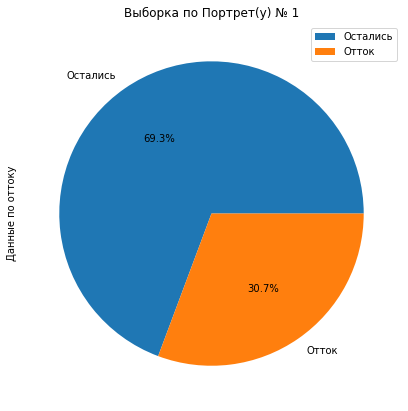

In [76]:
# построим круговую диаграмму
df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&city=="Ярославль"'
)['churn'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', title='Выборка по Портрет(у) № 1',labels=['Остались', 'Отток'] )
plt.legend(labels=['Остались', 'Отток'])
plt.ylabel('Данные по оттоку');

# Портрет №2
    Пол: мужской
    Возраст: 25-62
    Город: любой
    Оценка объектов собственности: 1 и выше
    Скоринговый рейтинг: 700 и выше
    Количество используемых продуктов: 1 и больше

In [77]:
# количество и доля оттока
p2 = df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&gender=="М"'
)['userid'].count()
p2_churn_rate = df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&gender=="М"&churn==1'
)['userid'].count()/ p2
print ('Мужчины: количество {}, доля оттока в выборке, соответствующей портрету{:.2%}'.format(p2, p2_churn_rate))

Мужчины: количество 2511, доля оттока в выборке, соответствующей портрету36.04%


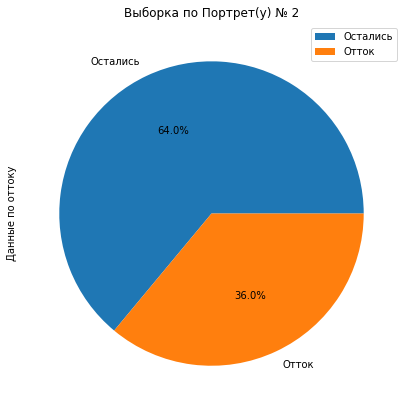

In [78]:
# построим круговую диаграмму
df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&gender=="М"'
)['churn'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', title='Выборка по Портрет(у) № 2', labels=['Остались', 'Отток'])
plt.legend(labels=['Остались', 'Отток'])
plt.ylabel('Данные по оттоку');

# Портрет №3
    Пол: женский
    Возраст: 25-62
    Город: любой
    Оценка объектов собственности: 1 и выше
    Скоринговый рейтинг: 700 и выше
    Количество используемых продуктов: 1 и больше

In [79]:
# количество и доля оттока
p3 = df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&gender=="Ж"'
)['userid'].count()
p3_churn_rate = df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&gender=="Ж"&churn==1'
)['userid'].count()/ p3
print ('Женщины: количество {}, доля оттока в выборке, соответствующей портрету {:.2%}'.format(p3, p3_churn_rate))

Женщины: количество 2433, доля оттока в выборке, соответствующей портрету 20.96%


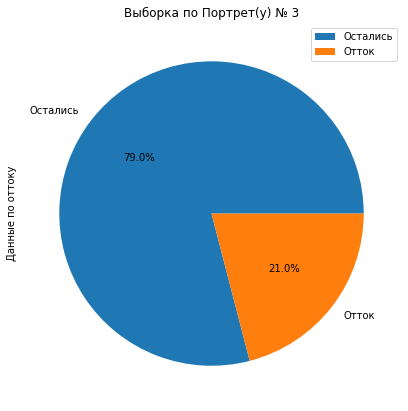

In [80]:
# построим круговую диаграмму
df.query(
    'score>700&equity>1&age_category.isin(["Взрослые", "Средний возраст"])&products>1&gender=="Ж"'
)['churn'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', title='Выборка по Портрет(у) № 3', labels=['Остались', 'Отток'])
plt.legend(labels=['Остались', 'Отток'])
plt.ylabel('Данные по оттоку');

# Портрет №4
Группа с увеличенными активами, продуктами, рейтингом

    Пол: любой
    Возраст: 25-62
    Город: любой
    Оценка объектов собственности: 3 и выше
    Скоринговый рейтинг: 800 и выше
    Количество используемых продуктов: 2 и больше

In [81]:
# количество и доля оттока
p4 = df.query(
    'score>800&equity>3&age_category.isin(["Взрослые", "Средний возраст"])&products>2'
)['userid'].count()
p4_churn_rate = df.query(
    'score>800&equity>3&age_category.isin(["Взрослые", "Средний возраст"])&products>2&churn==1'
)['userid'].count()/ p4
print (
    'Группа с увеличенными активами, продуктами, рейтингом: количество {}, доля оттока в выборке, соответствующей портрету {:.2%}'.
    format(p4, p4_churn_rate)
)

Группа с увеличенными активами, продуктами, рейтингом: количество 745, доля оттока в выборке, соответствующей портрету 51.01%


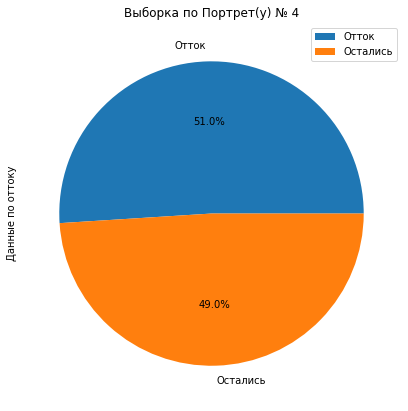

In [82]:
# построим круговую диаграмму
df.query(
    'score>800&equity>3&age_category.isin(["Взрослые", "Средний возраст"])&products>2'
)['churn'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', title='Выборка по Портрет(у) № 4', labels=['Отток', 'Остались'])
plt.legend(labels=['Отток', 'Остались'])
plt.ylabel('Данные по оттоку');

# Портрет №5
    Пол: мужской
    Возраст: 25-62
    Город: любой
    Оценка объектов собственности: 3 и выше
    Скоринговый рейтинг: 800 и выше
    Количество используемых продуктов: 2 и больше

In [83]:
# количество и доля оттока
p5 = df.query(
    'score>800&equity>3&age_category.isin(["Взрослые", "Средний возраст"])&products>2&gender=="М"'
)['userid'].count()
p5_churn_rate = df.query(
    'score>800&equity>3&age_category.isin(["Взрослые", "Средний возраст"])&products>2&gender=="М"&churn==1'
)['userid'].count()/ p5
print (
    'Мужчины из группы с увеличенными активами, продуктами, рейтингом: количество {}, доля оттока в выборке, соответствующей портрету {:.2%}'.
       format(p5, p5_churn_rate)
)

Мужчины из группы с увеличенными активами, продуктами, рейтингом: количество 427, доля оттока в выборке, соответствующей портрету 57.85%


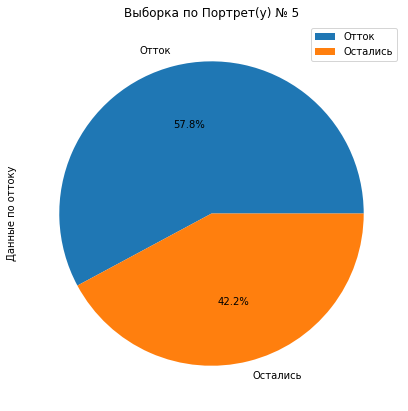

In [84]:
# построим круговую диаграмму
df.query(
    'score>800&equity>3&age_category.isin(["Взрослые", "Средний возраст"])&products>2&gender=="М"'
)['churn'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', title='Выборка по Портрет(у) № 5', labels=['Отток', 'Остались'])
plt.legend(labels=['Отток', 'Остались'])
plt.ylabel('Данные по оттоку');

# Портрет №6
    Пол: женский
    Возраст: 25-62
    Город: любой
    Оценка объектов собственности: 3 и выше
    Скоринговый рейтинг: 800 и выше
    Количество используемых продуктов: 2 и больше

In [85]:
# количество и доля оттока
p6 = df.query(
    'score>800&equity>3&age_category.isin(["Взрослые", "Средний возраст"])&products>2&gender=="Ж"'
)['userid'].count()
p6_churn_rate = df.query(
    'score>800&equity>3&age_category.isin(["Взрослые", "Средний возраст"])&products>2&gender=="Ж"&churn==1'
)['userid'].count()/ p6
print (
    'Женщины из группы с увеличенными активами, продуктами, рейтингом: количество {}, доля оттока в выборке, соответствующей портрету {:.2%}'.
    format(p6, p6_churn_rate))

Женщины из группы с увеличенными активами, продуктами, рейтингом: количество 318, доля оттока в выборке, соответствующей портрету 41.82%


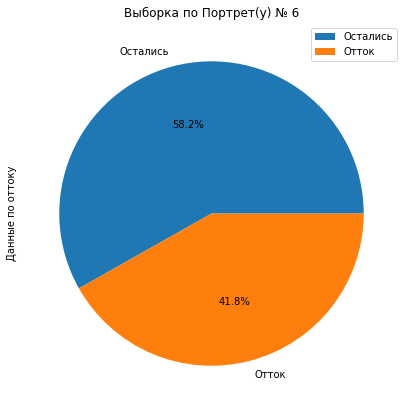

In [86]:
# построим круговую диаграмму
df.query(
    'score>800&equity>3&age_category.isin(["Взрослые", "Средний возраст"])&products>2&gender=="Ж"'
)['churn'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', title='Выборка по Портрет(у) № 6', labels=['Остались', 'Отток'])
plt.legend(labels=['Остались', 'Отток'])
plt.ylabel('Данные по оттоку');

**Выводы:**
    
- Сформировали шесть групп - три крупных численностью от 24 до 29 %% от обще численности, три мелких от 3 до 7 %% от общей численности
- Ниже выделим еще два портрета клиентов, вместе соответствующих примерно 10% клиентов в выборке
- Интересная группа по Ярославлю с оттоком 30%
- Максимальный отток 58% у мужчин в группе с увеличенными активами, продуктами, рейтингом
- Еще раз подтвердили данные, во-первых, что женщины более менее склонны к уходу чем мужчины, во-вторых, что более активные клиенты (количество активов, продуктов, более высокий рейтинг) более склонны к уходу
    
    

Опишем еще два описания портретов, не пересекающихся с портретами, описанными выше

# Портрет №7
    Пол: любой
    Возраст: молодые (до 25 лет)
    Город: любой
    Оценка объектов собственности: --
    Скоринговый рейтинг: --
    Количество используемых продуктов: --

In [87]:
# количество и доля оттока
p7 = df.query('age_category=="Молодые"')['userid'].count()
p7_churn_rate = df.query(
    'age_category=="Молодые"&churn==1'
)['userid'].count()/ p7
print ('Молодые: количество {}, доля оттока в выборке, соответствующей портрету {:.2%}'.format(p7, p7_churn_rate))

Молодые: количество 236, доля оттока в выборке, соответствующей портрету 13.14%


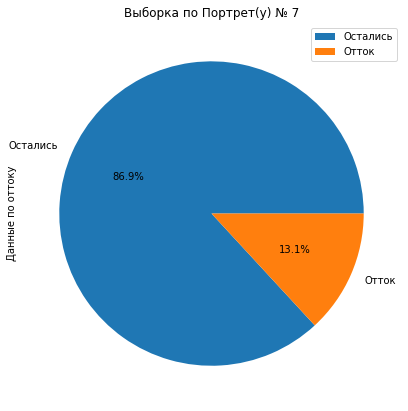

In [88]:
# построим круговую диаграмму
df.query(
    'age_category=="Молодые"'
)['churn'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', title='Выборка по Портрет(у) № 7', labels=['Остались', 'Отток'])
plt.legend(labels=['Остались', 'Отток'])
plt.ylabel('Данные по оттоку');

# Портрет №8
    Пол: любой
    Возраст: пожилые (старше 63 лет)
    Город: любой
    Оценка объектов собственности: --
    Скоринговый рейтинг: --
    Количество используемых продуктов: --

In [89]:
# количество и доля оттока
p8 = df.query('age_category=="Пожилые"')['userid'].count()
p8_churn_rate = df.query(
    'age_category=="Пожилые"&churn==1'
)['userid'].count()/ p8
print ('Пожилые: количество {}, доля оттока в выборке, соответствующей портрету {:.2%}'.format(p8, p8_churn_rate))

Пожилые: количество 780, доля оттока в выборке, соответствующей портрету 4.23%


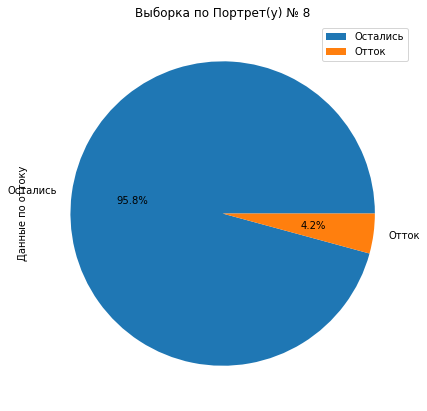

In [90]:
# построим круговую диаграмму
df.query(
    'age_category=="Пожилые"'
)['churn'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', title='Выборка по Портрет(у) № 8', labels=['Остались', 'Отток'])
plt.legend(labels=['Остались', 'Отток'])
plt.ylabel('Данные по оттоку');

# <a id="title6"> ОБЩИЕ ВЫВОДЫ</a>

С учетом ряда допущений - нет данных о рынке, о доходности клиентов и групп клиентов для банка, данных об оборотах по счетам и кредитным картам, характеристиках продуктов, стратегии развития банка делаем выводы по узкой задаче - составить портрет клиента, склонного к уходу, и предложить меры по его удержанию.

Необходимо также учитывать возможные ошибки в данных - первые две относительно незначительные (пропущенные данные по возрасту и дублирующиеся id клиентов банка), вторые вде выглядят более существенными - остуствие данных по остатку на счете(balance) и низкая оценка дохода(ниже мрот) по ряду клиентов. Последние две необходимо скорректировать , так как они могли повлиять на гипотезы и сегментацию.

Кроме того, повторюсь, нет данных по рынку и невозможно изучить общеотраслевые тенденции по оттоку.

По портретам целевых клиентов - сформировали шесть групп(первые три численностью 2400-2900 чел, вторые три 300-700 чел.): 
- Интересная группа по Ярославлю с оттоком 30%
- Максимальный отток 58% у мужчин в группе с увеличенными активами, продуктами, рейтингом
- Подтвердили данные, во-первых, что женщины более менее склонны к уходу чем мужчины, во-вторых, что более активные клиенты (количество активов, продуктов, более высокий рейтинг) более склонны к уходу

Проверили следующие гипотезы:
- отвергли гипотезу: среднее количество кредитных карт у оставшихся и отточных клиентов равны
- не получилось отвергнуть нулевую гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались. Вывод о различии сделать нельзя.
- отвергли гипотезу: между возрастом клиентов ушедших в отток и оставшихся нет статистически значимых различий. Разница статистически значима.
- отвергли гипотезу между активностью клиентов ушедших в отток и оставшихся нет статистически значимых различий

**Предложения по мероприятиям(сильно фантазировать по продуктам банка нецелесообразно - так как нет информации):**

**Общие рекомендации**
- к оттоку склонны клиенты с активами, хорошим рейтингом - с учетом рассмотренной гипотезы, более активно использовать премиальные кредитные карты с дополнительными услугами
- оценить алгоритм(бюрократию) существующего взаимодействия с клиентами, провести опросы, сравнить стоимость услуг с конкурентами,  (last_activity выглядит негативно в данном случае - как-будто клиенты уходят после взаимодействия с банком), возможно выделить менеджеров по работе с ключевыми клиентами
- для клиентов, получающих зарплату на карту другого банка, предложить льготные условия для перевода зарплаты
- подобрать более подходящие программы лояльности (возможно, клиенты часто путешествуют, являются предпринимателями)

Рекомендации по портретам:

**Портрет №1**
- оценить основной город присутствия Ярославль - количество клиентов больше, можно проводить больше мероприятий, связанных с удержанием клиентов -  кэшбэк за театры, концерты, кино, оплату доставки из ресторанов и кафе, кэшбек от партнеров

**Портреты №№2,5**
- провести ревизию по продуктам и информировать о новых доступных банковских продуктах
- предложить повышенный кешбек на товары для спорта, активного отдыха и рыбалки
- оценить возможность предложить страховые продукты

**Портреты №№3,6**
- удерживать женщин, как более лояльных клиентов, программами лояльности (например, предложить повышенный кэшбек на косметику, товары для дома и одежду)

**Портреты №№4,5,6**
- с учетом более высокого кредитного рейтинга предложить кредитные продукты
- предложить кредитную карту с беспроцентным обслуживанием и кэшбеком у партнеров
- оценить работу с остатками по счетам активных клиентов, предложить управление остатками

**Портрет №7**
- увеличить кэшбэк за театры, концерты, кино, и другие мероприятия, оплату доставки из ресторанов и кафе

**Портрет №8**
- повышенные ставки по вкладам и начислять проценты  на остаток средств на счете
- предложить перевести пенсию